In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pickle

In [2]:
# Reading data from csv
df = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
# Checking the null values in columns
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
df.value_counts("Sleep Disorder")

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [6]:
df["Sleep Disorder"].fillna('Fit', inplace = True)

In [7]:
df.head(15)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Fit
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Fit
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Fit
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Fit
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Fit
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Fit


In [8]:
corr = df.corr(numeric_only = True)

<Axes: >

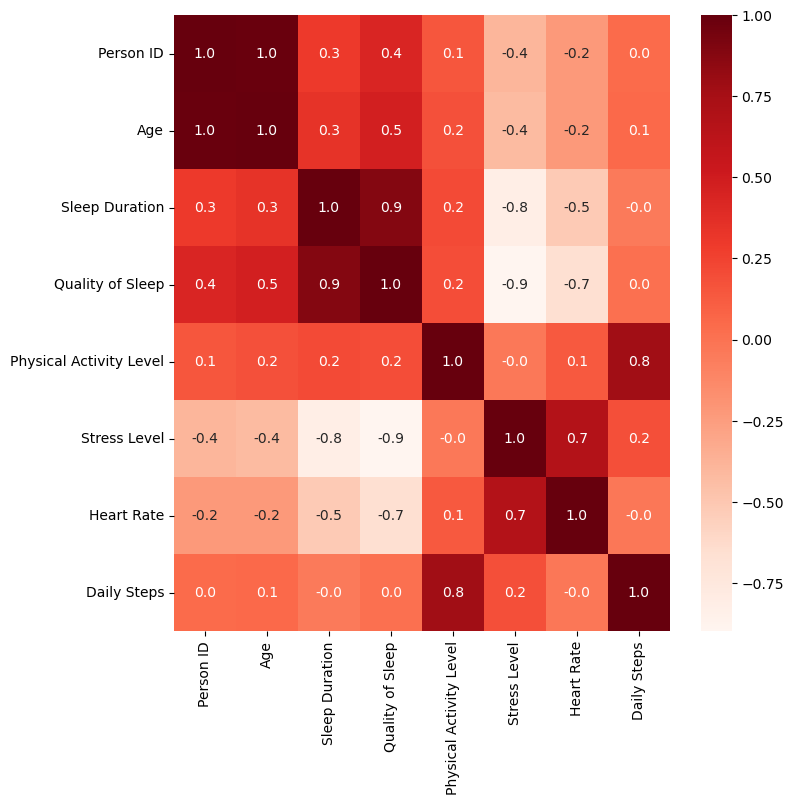

In [9]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr, cmap='Reds', annot=True, fmt='0.1f')

In [10]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
Fit            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [11]:
# Label encoding of Sleeping Disorder
label = LabelEncoder()
df['Sleep Disorder'] = label.fit_transform(df['Sleep Disorder'])

In [12]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
0    219
2     78
1     77
Name: count, dtype: int64

In [13]:
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [14]:
# Label encoding of Gender
df['Gender'] = label.fit_transform(df['Gender'])


In [15]:
df['Gender'].value_counts()

Gender
1    189
0    185
Name: count, dtype: int64

In [16]:
df["BMI Category"] = df["BMI Category"].replace('Normal Weight', 'Normal')

In [17]:
df["BMI Category"].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [18]:
df["BMI Category"] = label.fit_transform(df["BMI Category"])

In [19]:
df["BMI Category"].value_counts()

BMI Category
0    216
2    148
1     10
Name: count, dtype: int64

In [20]:
Splitted_data = df['Blood Pressure'].str.split('/', expand = True)

In [21]:
df[['Systolic BP', 'Diastolic BP']] = Splitted_data.astype(int)

In [22]:
type(df['Systolic BP'][0])

numpy.int32

In [23]:
df.drop(columns=['Blood Pressure', 'Person ID'], inplace=True)

In [24]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,Software Engineer,6.1,6,42,6,2,77,4200,0,126,83
1,1,28,Doctor,6.2,6,60,8,0,75,10000,0,125,80
2,1,28,Doctor,6.2,6,60,8,0,75,10000,0,125,80
3,1,28,Sales Representative,5.9,4,30,8,1,85,3000,2,140,90
4,1,28,Sales Representative,5.9,4,30,8,1,85,3000,2,140,90


In [25]:
df["Occupation"].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [26]:
df['Occupation'] = df['Occupation'].replace(['Accountant', 'Salesperson', 'Software Engineer','Scientist',              
'Sales Representative','Manager'], 'Others')
df["Occupation"].unique()

array(['Others', 'Doctor', 'Teacher', 'Nurse', 'Engineer', 'Lawyer'],
      dtype=object)

In [27]:
df["Occupation"].value_counts()

Occupation
Others      80
Nurse       73
Doctor      71
Engineer    63
Lawyer      47
Teacher     40
Name: count, dtype: int64

### One Hot encoding the occupation values

In [28]:
encode = OneHotEncoder()
# labeled_occupation = label.fit_transform(df['Occupation'])

In [29]:
# labeled_occupation

In [30]:
encoded = pd.DataFrame(encode.fit_transform(df[['Occupation']]).toarray(), columns=['Doctor', 'Engineer', 'Lawyer', 'Nurse', 'Others',  'Teacher'])

In [31]:
encoded

,Doctor,Engineer,Lawyer,Nurse,Others,Teacher
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
369,0.0,0.0,0.0,1.0,0.0,0.0
370,0.0,0.0,0.0,1.0,0.0,0.0
371,0.0,0.0,0.0,1.0,0.0,0.0
372,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
df = df.join(encoded)

In [33]:
df = df.drop(columns=['Occupation'])

In [34]:
df.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,Doctor,Engineer,Lawyer,Nurse,Others,Teacher
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,7.132086,7.312834,59.171123,5.385027,0.818182,70.165775,6816.844920,0.622995,128.553476,84.649733,0.189840,0.168449,0.125668,0.195187,0.213904,0.106952
std,0.500641,8.673133,0.795657,1.196956,20.830804,1.774526,0.970940,4.135676,1617.915679,0.808537,7.748118,6.161611,0.392699,0.374766,0.331919,0.396876,0.410609,0.309466
min,0.000000,27.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,115.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.250000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,0.000000,125.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,43.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,0.000000,130.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,7.800000,8.000000,75.000000,7.000000,2.000000,72.000000,8000.000000,1.000000,135.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,59.000000,8.500000,9.000000,90.000000,8.000000,2.000000,86.000000,10000.000000,2.000000,142.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
corre_data = df.corr(numeric_only = True, method='pearson')

In [36]:
corre_data

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,Doctor,Engineer,Lawyer,Nurse,Others,Teacher
Gender,1.000000,-0.596358,-0.121579,-0.291366,0.001454,0.396018,-0.339945,0.217105,-0.014509,-0.362591,-0.210527,-0.268378,0.451647,-0.011959,0.342818,-0.497764,-0.018621,-0.263264
Age,-0.596358,1.000000,0.344709,0.473734,0.178993,-0.422344,0.523881,-0.225606,0.057973,0.487832,0.605878,0.593839,-0.531401,0.228784,-0.120761,0.546397,-0.117258,-0.018359
Sleep Duration,-0.121579,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.377637,-0.516455,-0.039533,-0.239109,-0.180406,-0.166570,-0.098486,0.484419,0.132904,-0.042809,-0.268888,-0.192539
Quality of Sleep,-0.291366,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.303876,-0.659865,0.016791,-0.213003,-0.121632,-0.110151,-0.269276,0.414126,0.184201,0.023495,-0.218341,-0.097806
Physical Activity Level,0.001454,0.178993,0.212360,0.192896,1.000000,-0.034134,0.075508,0.136971,0.772723,0.236560,0.265416,0.382651,-0.088866,-0.158241,0.205104,0.459681,-0.210849,-0.225345
Stress Level,0.396018,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.163665,0.670026,0.186829,0.151893,0.102818,0.091811,0.368038,-0.379980,-0.068714,0.045274,0.133187,-0.167945
BMI Category,-0.339945,0.523881,-0.377637,-0.303876,0.075508,0.163665,1.000000,0.248550,0.015949,0.728650,0.723660,0.758766,-0.380332,-0.335570,-0.269986,0.502827,0.171784,0.305798
Heart Rate,0.217105,-0.225606,-0.516455,-0.659865,0.136971,0.670026,0.248550,1.000000,-0.030309,0.384343,0.294143,0.271092,0.158853,-0.324232,-0.048419,0.218708,0.157462,-0.246407
Daily Steps,-0.014509,0.057973,-0.039533,0.016791,0.772723,0.186829,0.015949,-0.030309,1.000000,0.112053,0.103342,0.241986,-0.002515,-0.232845,0.198237,0.378152,-0.172108,-0.184056
Sleep Disorder,-0.362591,0.487832,-0.239109,-0.213003,0.236560,0.151893,0.728650,0.384343,0.112053,1.000000,0.730103,0.768796,-0.280605,-0.285327,-0.212591,0.664386,-0.022931,0.108006


In [37]:
#plt.plot(df['Heart Rate'], df['Sleep Disorder'])

<Axes: >

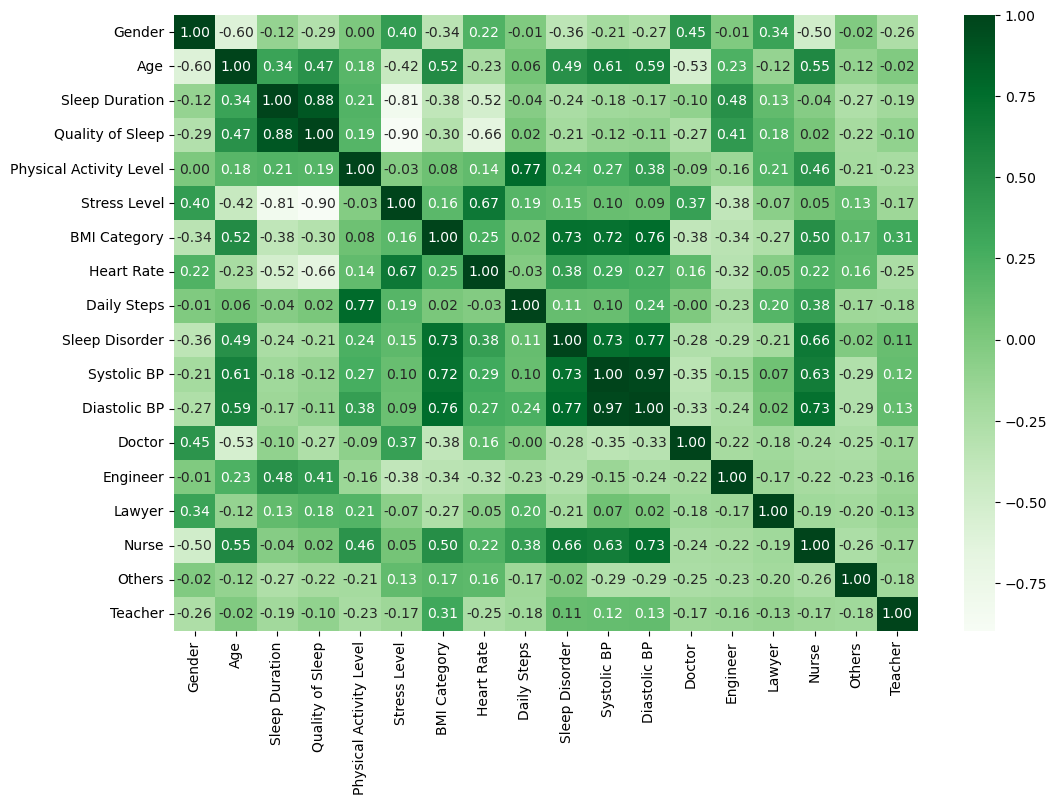

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(corre_data, annot = True,cmap='Greens', fmt='0.2f')

### Splitting data

In [39]:
X = df.drop(columns=['Sleep Disorder', 'Others'],axis=1)
Y = df['Sleep Disorder']

In [40]:
X.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,Doctor,Engineer,Lawyer,Nurse,Teacher
0,1,27,6.1,6,42,6,2,77,4200,126,83,0.0,0.0,0.0,0.0,0.0
1,1,28,6.2,6,60,8,0,75,10000,125,80,1.0,0.0,0.0,0.0,0.0
2,1,28,6.2,6,60,8,0,75,10000,125,80,1.0,0.0,0.0,0.0,0.0
3,1,28,5.9,4,30,8,1,85,3000,140,90,0.0,0.0,0.0,0.0,0.0
4,1,28,5.9,4,30,8,1,85,3000,140,90,0.0,0.0,0.0,0.0,0.0


In [41]:
Y

0      0
1      0
2      0
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int32

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=44)

In [43]:
print(X.shape, X_train.shape, X_test.shape, sep='<-->')

(374, 16)<-->(280, 16)<-->(94, 16)


In [44]:
X_train

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,Doctor,Engineer,Lawyer,Nurse,Teacher
354,0,58,8.0,9,75,3,2,68,7000,140,95,0.0,0.0,0.0,1.0,0.0
83,1,35,6.7,7,40,5,2,70,5600,128,84,0.0,0.0,0.0,0.0,1.0
49,1,31,7.7,7,75,6,0,70,8000,120,80,1.0,0.0,0.0,0.0,0.0
218,1,43,7.8,8,90,5,0,70,8000,130,85,0.0,1.0,0.0,0.0,0.0
347,0,57,8.2,9,75,3,2,68,7000,140,95,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,36,7.2,8,60,4,0,68,7000,115,75,0.0,0.0,0.0,0.0,0.0
59,1,32,7.7,7,75,6,0,70,8000,120,80,1.0,0.0,0.0,0.0,0.0
173,1,41,7.7,8,90,5,0,70,8000,130,85,0.0,0.0,1.0,0.0,0.0
241,1,44,6.3,6,45,7,2,72,6000,130,85,0.0,0.0,0.0,0.0,0.0


### Model Training and testing

In [45]:
model = KNeighborsClassifier(n_neighbors=18)

In [46]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [47]:
X_test.shape
type(X_test)

pandas.core.frame.DataFrame

In [48]:
# Testing
X_test_prediction = model.predict(np.array(X_test))
accuracy_test = accuracy_score(X_test_prediction, y_test)

C:\Users\HP\anaconda3\envs\its_myworld\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [49]:
accuracy_test

0.9148936170212766

In [50]:
df['Diastolic BP'].min()

75

In [51]:
with open('model_file', 'wb') as file:
    pickle.dump(model, file)

In [52]:
with open('model_file', 'rb') as file:
    obj = pickle.load(file)

In [53]:
obj.predict([[0, 57, 8.2, 9, 75, 3, 2, 68, 7000, 140, 95, 0.0, 0.0, 0.0, 1.0, 0.0

             ]])

C:\Users\HP\anaconda3\envs\its_myworld\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])